<a href="https://colab.research.google.com/github/SeungYeon2000/pytorch/blob/main/Chap6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **6.1Artificial Neurons**
구성요소인 neurons (input의 linear transformation) -> nonlinear function(activation function) 적용 -> complicated functions

# **6.1.1 composing a multilayer network**
multilayer networks : neuron의 output layer가 다음 layer의 input layer가 됨


# **6.1.2 understanding the error function**
neural networks : shape of the error function이 linear model과 다름, 정확히 한 값(error-squared loss function)이 아니라 approximation(activation function 때문)을 보여주게 됨. parameter와 imperfection은 임의적

neurons의 ensemble은 각 neuron의 linear/nonlinear behavior에 따라 달려있음

# **6.1.3 Activation**
activation function의 역할

1. model 내부에서 output function이 다른 값마다 다른 slope를 가지게 해 줌 -> 임의의 functions로 approximate하게 됨
2. network의 마지막 layer에서 이전의 linear opearation의 결과를 주어진 range로 concentrate시킴

* 주어진 range로 concentrate시키기 위해 

1. capping the output range : torch.nn.Hardtanh 이용, 0이하는 0, 10 이상은 10 (다만 default range는 -1 ~ 1)

2. compressing the output range : torch.nn.Sigmoid, 1 /
(1 + e ** -x), torch.tanh 등의 함수 이용, sensitive range에 good doggy 들어가도록
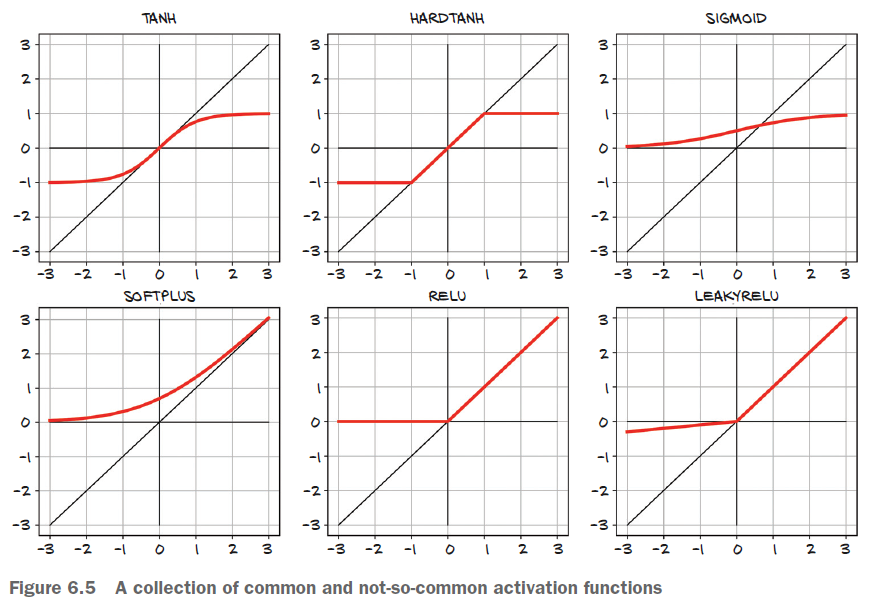

Hardtanh와 ReLU. ReLU가 최근 결과에서 많이 쓰임

# **6.1.5 choosing the best activation function**
activation functions 필수 특징: nonlinear & differentiable (hardtanh와 relu에서처럼 점이 끊기는 것은 괜찮)

참인 전제 : 최소 하나의 sensitive range를 가진다 (input이 nontrivial change면 ->output도 nontrivial change) & 대다수가 insensitive(saturated) range를 가짐 (input result의 변화가 output 변화에 거의 영향을 미치지 않음)

activation function은 이 특징 중 하나라도 가진다:

1. input이 무한으로 음수값으로 향할 때 더 낮은 bound로 접근한다
2. input이 무한으로 양수값으로 향할 때 더 높은 bound로 접근 (1과 비슷하나 inverse하게)

input이 response range에 있을 때 error가 더 효과적으로 activation을 통해 역전파하게 됨 (error는 반면 neuron에 큰 영향을 미치진 않음)

# **6.1.6 What learning means in neural network**
Learning : Specializing a generic model to a task using examples

Neural Deep learning : 설명 모델 제시 없이도 approximation 가능하도록(+input/output relationship)

# **6.2 The PyTorch nn module**
torch.nn : a whole submodule dedicated to neural networks, modules(모든 종류의 neural network architectures를 만들기 위해 필요한 구성요소)를 포함

pytorch module은 nn.Module base class에서 기인한 pytorch class

module은 하나 이상의 Parameter instances/submodules를 attributes로 가질 수 있다, which are tensors whose values are optimized during the training process (think w and b in our linear model)

In [ ]:
#In[1]
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [ ]:
#In[2]
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # axis1에 extra dimension을 추가함
t_u = torch.tensor(t_u).unsqueeze(1) # 

t_u.shape

torch.Size([11, 1])

In [ ]:
#In[3]
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([2, 8, 7, 3, 6, 5, 9, 0, 1]), tensor([10,  4]))

In [ ]:
#In[4]
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [ ]:
#In[5]
import torch.nn as nn

linear_model = nn.Linear(1, 1) # the size of the input/output tensor for the module
linear_model(t_un_val)         # bias defaulting to True

tensor([[-5.9511],
        [-4.9036]], grad_fn=<AddmmBackward>)

주의 :

     y = model(x)는 가능

      y = model.forward (x) 는 silent error.

      -> forward를 직접적으로 쓰면 안됨

# **6.2.2 returning to the linear model**
nn.Linear constructor는 세 가지 논거가 있음

1. input features의 수
2. output features의 수
3. bias defaulting or not(True)

In [ ]:
#In[6]:
linear_model.weight

Parameter containing:
tensor([[-0.8657]], requires_grad=True)

In [ ]:
#In[7]:
linear_model.bias

Parameter containing:
tensor([-0.0296], requires_grad=True)

In [ ]:
#In[8]:
x = torch.ones(1)
linear_model(x)

tensor([-0.8953], grad_fn=<AddBackward0>)

multiple samples를 수용할 때도 modules은 batch에서 sample의 수가 0번째 차원이라고 예상함

In [ ]:
# Batching Inputs
# input tensor의 size를 B x Nin으로 써줌(B:batch size, Nin:input features의 수)
#In[9]:
x = torch.ones(10,1)
linear_model(x)

tensor([[-0.8953],
        [-0.8953],
        [-0.8953],
        [-0.8953],
        [-0.8953],
        [-0.8953],
        [-0.8953],
        [-0.8953],
        [-0.8953],
        [-0.8953]], grad_fn=<AddmmBackward>)

In [ ]:
#In[10]:
linear_model = nn.Linear(1, 1) # 재정의
optimizer = optim.SGD(
    linear_model.parameters(), # [params] 불러옴
    lr=1e-2)


In [ ]:
#In [11]:
linear_model.parameters()

<generator object Module.parameters at 0x7f79824376d0>

In [ ]:
#In [12]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.0221]], requires_grad=True), Parameter containing:
 tensor([0.5066], requires_grad=True)]

In [ ]:
#In [13]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
            
            # model 자체에서 parameters를 내부적으로 가지고 있기 때문에 model에 명시적으로 params를 통과하지 않음

In [ ]:
#In [14]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)


Epoch 1, Training loss 81.0481, Validation loss 131.1284
Epoch 1000, Training loss 3.4419, Validation loss 4.2654
Epoch 2000, Training loss 2.8866, Validation loss 3.3543
Epoch 3000, Training loss 2.8758, Validation loss 3.2473

Parameter containing:
tensor([[5.2910]], requires_grad=True)
Parameter containing:
tensor([-16.8845], requires_grad=True)


In [ ]:
#In [15]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), #***
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)


# nn에는 여러 common loss function이 존재, nn.MSELoss 중에 있음 (nn에 있는 Loss functions는 nn.Module의 subclasses이기도 함)
# *** : loss_fn (hand-written)을 지우고 대체하는 코드 작성함

Epoch 1, Training loss 245.7489, Validation loss 412.7833
Epoch 1000, Training loss 3.4542, Validation loss 4.2785
Epoch 2000, Training loss 2.8869, Validation loss 3.3557
Epoch 3000, Training loss 2.8758, Validation loss 3.2474

Parameter containing:
tensor([[5.2909]], requires_grad=True)
Parameter containing:
tensor([-16.8840], requires_grad=True)


# **6.3.1 replacing the linear model**
다른 것들 모두 고정시켜놓고 model만 재정의. (linear module, 첫 번째 linear+activation layer = hidden layer)

nn은 nn.Sequential container를 통해서 modules를 연관시키는 방식을 제시한다.

In [ ]:
#In [16]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

# model은 1 input feature에서 13 hidden features로 펼쳐지고, tanh activation을 통과하며 선형적으로 13개의 숫자들을 조합해 1개의 output feature로 반환함

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

# **6.3.2 inspecting the parameters** 
model.parametes()는 첫/둘째 linear modules 양쪽에서부터 weight와 bias를 collect함, shape를 printing 해봄으로써 parameters를 점검해보는 것이 유익


In [ ]:
#In [17]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [ ]:
#In [18]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [ ]:
#In [19]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
#In [20]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [ ]:
#In [21]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.3491], requires_grad=True)

In [ ]:
#In [22]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # 안정성을 위해 learning rate 하향조정

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 184.2204, Validation loss 310.7368
Epoch 1000, Training loss 5.7773, Validation loss 4.3251
Epoch 2000, Training loss 3.4306, Validation loss 1.8894
Epoch 3000, Training loss 2.2614, Validation loss 0.8767
Epoch 4000, Training loss 2.0795, Validation loss 1.0843
Epoch 5000, Training loss 2.0485, Validation loss 1.0162
output tensor([[20.8534],
        [12.4181]], grad_fn=<AddmmBackward>)
answer tensor([[21.],
        [11.]])
hidden tensor([[ 0.0060],
        [ 0.0020],
        [ 0.0047],
        [-0.0290],
        [ 0.0205],
        [-0.0079],
        [-0.0045],
        [ 0.0172]])


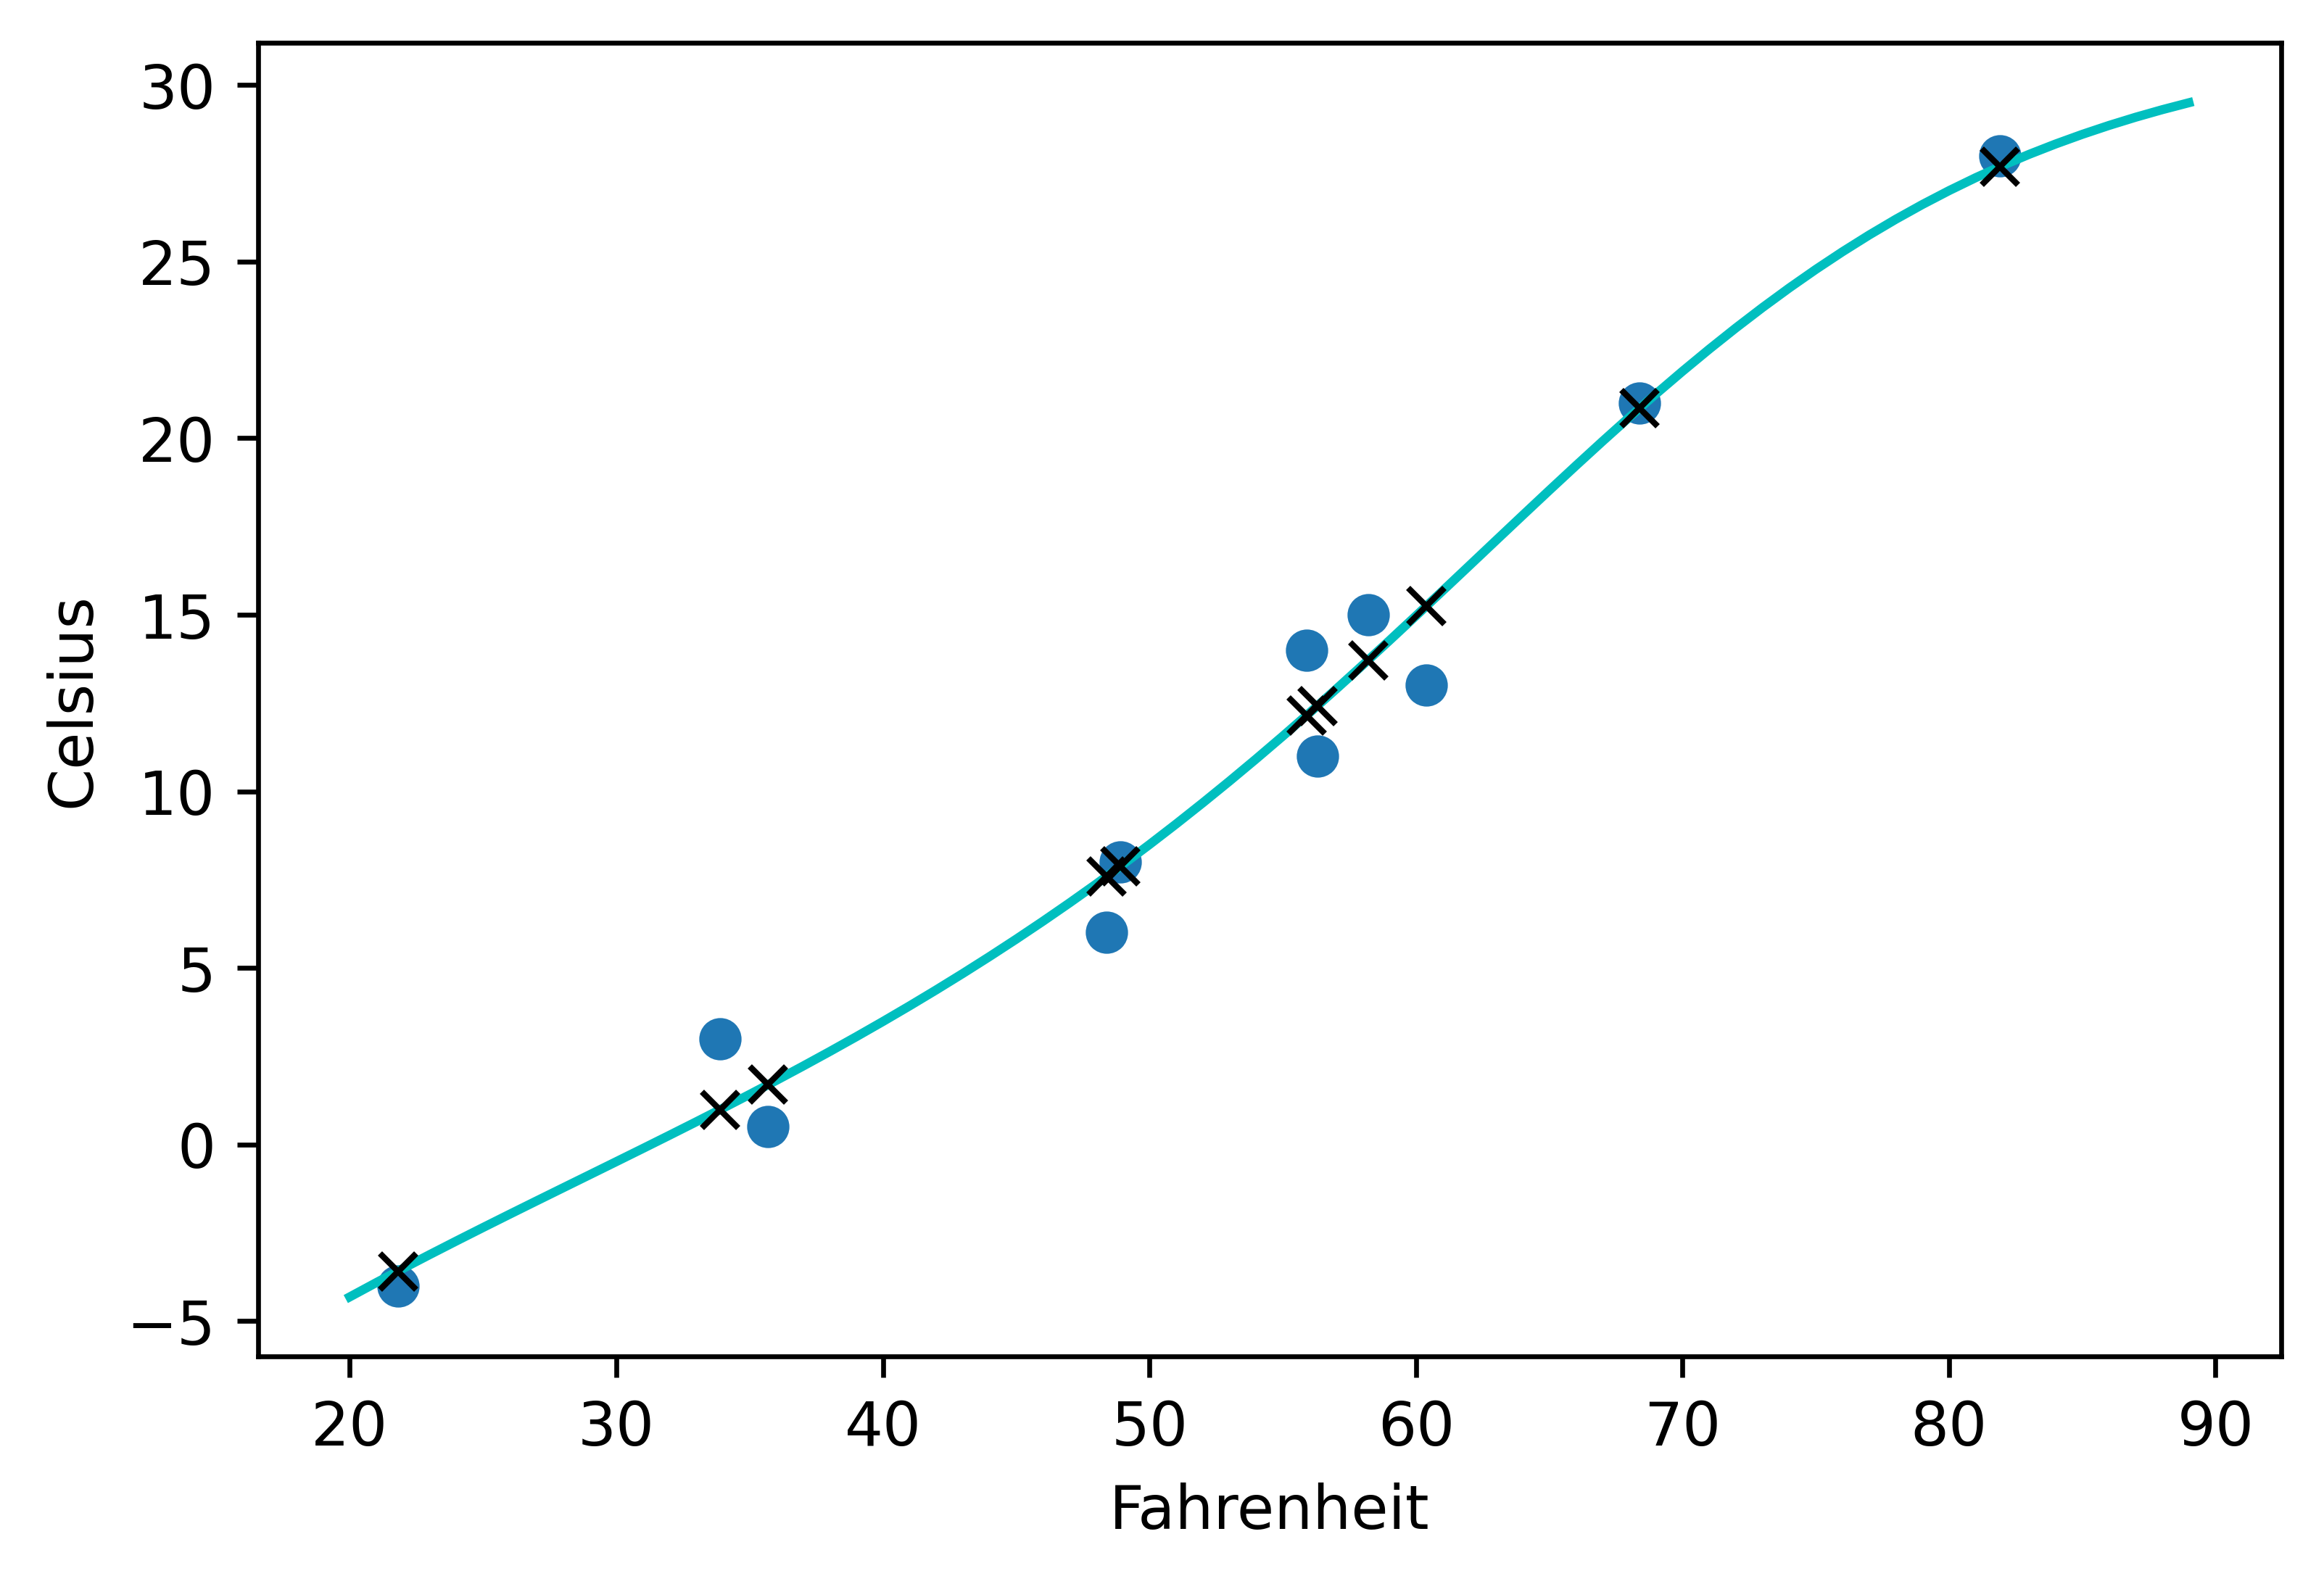

In [ ]:
#In [23]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')